# SAT & ACT Participation & Score Analysis
## Magnus Bigelow

## Problem Statement

The SAT and ACT play a prominent role in the lives of young Americans as the primary tests taken by prospective college students to demonstrate their college readiness. As important gatekeepers to a college education, and determinants in which college a student is admitted to both tests see a great degree of scrutiny and are constantly considering potential revisions. In 2016 the SAT decided to shorten the test and revise the content in order to better test for skill's needed in college and reduce the reliance on 'tricks' and specific prep for the test.

With a dataset of average scores and participation in the SAT and ACT by state for the years 2017 and 2018 we will look at states that have had large increases or decreases in SAT / ACT participation and identify why those states have seen such swings. Then we will identify a state that is ripe for the SAT to increase their presence in and recommend strategies to increase participation.

### Contents:
- [Data Sources](#Data-Sources)
- [Imports & Loading Data](#Imports-&-Loading-Data)
- [Displaying Data, Preliminary EDA & Cleaning](#Displaying-Data,-Preliminary-EDA-&-Cleaning)
- [Data Dictionary](#Data-Dictionary)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Data-Visualization)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Data Sources

The data used for this project was compiled from the following locations: 
    [2017 SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
    [2018 SAT](https://reports.collegeboard.org/sat-suite-program-results/state-results)
    [2017 ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)
    [2018 ACT](http://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf)

## Imports & Loading Data 

#### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading In SAT & ACT  Data

In [2]:
sat_17 = pd.read_csv('Data/sat_2017.csv')
act_17 = pd.read_csv('Data/act_2017.csv')
sat_18 = pd.read_csv('Data/sat_2018.csv')
act_18 = pd.read_csv('Data/act_2018.csv')

## Displaying Data, Preliminary EDA & Cleaning

###### SAT 2017

In [3]:
display(sat_17.head(3))
display(sat_17.info())
display(sat_17.describe())

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


None

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


We can see that the SAT 17 dataset consists of 51 entries (all 50 states + DC) and includedes: participation, evidence-based reading and writing, math and a total scores. There are not null objects in the dataset, however, a couple things immediately spring to mind as errors / in need of revision: the min for the Math variable is only 52 when the minimum SAT score in a subject is 200 and participation is an object which needs to be changed to a float so we can perform math operations on it.

Next steps will be to locate the error(s) within math and fix that along with the participation column.

In [4]:
display(sat_17.sort_values(by = 'Math').head(3))

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060
8,District of Columbia,100%,482,468,950
7,Delaware,100%,503,492,996


We can see that the Maryland has a Math value of 52 that is clearly incorrect, however, the other states look to be okay. Referencing the source file for the 2017 SAT we can see that Maryland's Math score should in fact be 524.

In [5]:
# create a Maryland boolean filter using 2 letter state code (will use as standard throughout analysis)
md_sort_sat_17 = sat_17['State'] == 'Maryland'
# Assign Maryland the correct math score of 524
sat_17.loc[md_sort_sat_17,'Math'] = 524

In [6]:
# Fix data type of participation
# Code taken with minor modifications from
# https://stackoverflow.com/questions/50686004/change-column-with-string-of-percent-to-float-pandas-dataframe
sat_17['Participation'] = sat_17['Participation'].str.replace(r'%', r'.0').astype('float')

Additionally we can see that some of the column names are quite long and going forward there will likely be some overlap in names between datasets. As such, we need a naming convention that makes it easier to reference columns and doesn't cause confusion between data sets.

The convention will be as follows: 'act' for ACT of 'sat' for SAT _ 3/5 letter abbreviation (i.e. part for participation) _ year

an example would be sat_math_17 or sat_ebrw_17 from this dataset

We will not rename 'State' besides making lowercase as we will merge on that variable

In [7]:
# initialize dictionary of new names for the dataset
sat_17_names = {'State':'state',
                'Participation':'sat_part_17',
                'Evidence-Based Reading and Writing':'sat_ebrw_17',
                'Math':'sat_math_17',
                'Total':'sat_total_17'}
sat_17.rename(columns=sat_17_names, inplace=True)

###### ACT 2017

In [8]:
display(act_17.head(3))
display(act_17.info())
display(act_17.describe())

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


None

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


We can see that the ACT 17 dataset consists of 52 entries (all 50 states, DC and national) and includedes: participation, english, math, reading, science and a composite scores. There are not null objects in the dataset, however, a couple things immediately spring to mind as errors / in need of revision: the min for the science variable is only 2.3 which is much lower than the other minimum scores and participation is an object which needs to be changed to a float so we can perform math operations on it and so is composite.

Next steps will be to locate the error(s) within science and fix that along with the participation and composite columns.

Additionally we will use the naming convention mentioned previously to make it easier to reference columns

In [9]:
act_17.sort_values(by = 'Science').head(3)

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6
29,Nevada,100%,16.3,18.0,18.1,18.2,17.8
25,Mississippi,100%,18.2,18.1,18.8,18.8,18.6


We can see that it appears as though only Maryland has the wrong number for science, and checking the source file we can see that Maryland's science score should be 23.2

In [10]:
# create a Maryland boolean filter using 2 letter state code (will use as standard throughout analysis)
md_sort_act_17 = act_17['State'] == 'Maryland'
# Assign Maryland the correct math score of 524
act_17.loc[md_sort_act_17,'Science'] = 23.2

In [11]:
# Fix data type of participation
# Code taken with minor modifications from
# https://stackoverflow.com/questions/50686004/change-column-with-string-of-percent-to-float-pandas-dataframe
act_17['Participation'] = act_17['Participation'].str.replace(r'%', r'.0').astype('float');

In attempting to convert the 'Composite' column to numeric an error occurred and it became apparent that one of 'cells' has an x at the end. We will fix that and then standardize the column names

In [12]:
# Fix composite 
act_17['Composite'] = act_17['Composite'].str.replace(r'x', r'').astype('float');

In [13]:
# initialize dictionary of new names for the dataset
act_17_names = {'State':'state',
                'Participation':'act_part_17',
                'English':'act_engl_17',
                'Math':'act_math_17',
                'Reading':'act_read_17',
                'Science':'act_sci_17',
                'Composite':'act_comp_17'}
act_17.rename(columns=act_17_names, inplace=True)

###### SAT 2018

In [14]:
display(sat_18.head(3))
display(sat_18.info())
display(sat_18.describe())

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


None

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


The 2018 SAT dataset does not have obvious outliers and we will only need to convert Participation to a float and fix the column names as we did with the previous SAT dataset

In [15]:
# Fix data type of participation
# Code taken with minor modifications from
# https://stackoverflow.com/questions/50686004/change-column-with-string-of-percent-to-float-pandas-dataframe
sat_18['Participation'] = sat_18['Participation'].str.replace(r'%', r'.0').astype('float')

In [16]:
# initialize dictionary of new names for the dataset
sat_18_names = {'State':'state',
                'Participation':'sat_part_18',
                'Evidence-Based Reading and Writing':'sat_ebrw_18',
                'Math':'sat_math_18',
                'Total':'sat_total_18'}
sat_18.rename(columns=sat_18_names, inplace=True)

###### ACT 2018

In [17]:
display(act_18.head(3))
display(act_18.info())
display(act_18.describe())

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
State            52 non-null object
Participation    52 non-null object
Composite        52 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


None

,Composite
count,52.000000
mean,21.544231
std,2.119417
min,17.700000
25%,19.975000
50%,21.300000
75%,23.725000
max,25.600000


We can see that for the 2018 ACT data we only have a composite score and not the individual components, this is not a problem as we are doing a fairly high level analysis and getting into sub categories is not as pertinent.

We do need to fix the participation column once again and change the column names

In [18]:
# Fix data type of participation
# Code taken with minor modifications from
# https://stackoverflow.com/questions/50686004/change-column-with-string-of-percent-to-float-pandas-dataframe
act_18['Participation'] = act_18['Participation'].str.replace(r'%', r'.0').astype('float');

In [19]:
# initialize dictionary of new names for the dataset
act_18_names = {'State':'state',
                'Participation':'act_part_18',
                'Composite':'act_comp_18'}
act_18.rename(columns=act_18_names, inplace=True)

###### Preparing for Merger & Merging

We are planning to merge the dataframes on the 'state' column so we must ensure that there are no duplicates in any of the 'state' columns and make all the names lowercase to ensure we don't run into issues with missing or false capitalization

In [20]:
# lower case all state columns
sat_17['state'] = sat_17['state'].str.lower()
sat_18['state'] = sat_18['state'].str.lower()
act_17['state'] = act_17['state'].str.lower()
act_18['state'] = act_18['state'].str.lower()

In [21]:
# check for duplicates
display(sat_17[sat_17.duplicated('state',False)])
display(sat_18[sat_18.duplicated('state',False)])
display(act_17[act_17.duplicated('state',False)])
display(act_18[act_18.duplicated('state',False)])

,state,sat_part_17,sat_ebrw_17,sat_math_17,sat_total_17


,state,sat_part_18,sat_ebrw_18,sat_math_18,sat_total_18


,state,act_part_17,act_engl_17,act_math_17,act_read_17,act_sci_17,act_comp_17


,state,act_part_18,act_comp_18
19,maine,7.0,24.0
20,maine,7.0,24.0


We can see that the act_18 dataframe has maine duplicated, lets delete the second maine and then start merging

In [22]:
act_18.drop_duplicates('state', inplace=True)

In [23]:
# combine act datasets
act_combined = pd.merge(act_17,act_18, on = 'state')
# combine sat datasets
sat_combined = pd.merge(sat_17,sat_18, on = 'state')

Both ACT and SAT dataframs appear to have merged well and have 0 nulls and 51 total rows, so lets merge them together and look at the results

In [24]:
test_data = pd.merge(act_combined,sat_combined, on = 'state')

Additional test were run to look for null values and looking at the states. There are no null values and all values were included from the 4 original dataframes for the 50 states & DC, national was automatically removed from act_17 when merging. The dataframe is now ready to be analyzed.

Tests were removed for readability

##### Note: Florida

In exploratory data analysis I noted that Florida had a huge drop in SAT participation in 2018, I looked into this and the initial dataset did not match the information from the CollegeBoard, both for Florida's participation and their 2018 SAT scores. I did a spot check on a couple of other states and they seemed to be correct so I inferred that Florida was likely the only mistake, and fixed it below so that the analysis could be run with correct data.

The correct data I pulled from the [SAT State Report for Florida 2018](https://reports.collegeboard.org/pdf/2018-florida-sat-suite-assessments-annual-report.pdf)

In [25]:
# correct information in list [participation, math, ebrw, total]
fl_18_correct = [97,493,522,1014]
# filter for Florida
fl_filt = test_data['state'] == 'florida'
# name of columns to be fixed in a list
fl_columns = ['sat_part_18','sat_math_18','sat_ebrw_18','sat_total_18']
# loop too add correct values
for i in range(0,len(fl_columns)):
    test_data.loc[fl_filt,fl_columns[i]] = fl_18_correct[i]
    
# Check that fix worked
test_data[fl_filt][fl_columns]

,sat_part_18,sat_math_18,sat_ebrw_18,sat_total_18
9,97.0,493,522,1014


**Note: Utah**

In exploring scatter plots I noted 2 states with huge drops in average SAT score from 2017 to 2018, while one state's (Colorado's) drop made sense given my other findings, the other (Utah) did not and I double checked their 2018 SAT data and corrected it.

The correct data is pulled from: [SAT State Report for Utah 2018](https://reports.collegeboard.org/pdf/2018-utah-sat-suite-assessments-annual-report.pdf)

In [26]:
# correct information in list [math, ebrw, total]
ut_18_correct = [612,618,1230]
# filter for utah
ut_filt = test_data['state'] == 'utah'
# name of columns to be fixed in a list
ut_columns = ['sat_math_18','sat_ebrw_18','sat_total_18']
# loop too add correct values
for i in range(0,len(ut_columns)):
    test_data.loc[ut_filt,ut_columns[i]] = ut_18_correct[i]
    
# Check that fix worked
test_data[ut_filt][ut_columns]

,sat_math_18,sat_ebrw_18,sat_total_18
44,612,618,1230


###### Additional Information of Interest

In addition to the given data, there are a couple values we want to calculate to improve the analysis:
change in SAT participation, change in ACT participation, combined change in SAT and ACT participation, SAT part > ACT part by year

In [27]:
# Increase in SAT participation
test_data['sat_part_inc'] = test_data['sat_part_18'] - test_data['sat_part_17']
# Increase in ACT participation
test_data['act_part_inc'] = test_data['act_part_18'] - test_data['act_part_17']
# Increase in combined SAT + ACT participation
test_data['part_inc'] = test_data['sat_part_inc'] + test_data['act_part_inc']
# Boolean for if SAT is more popular in 2017
# Thanks wmatt
# https://stackoverflow.com/questions/47741920/python-pandas-assign-where-to-compute-boolean-column
test_data['sat_dom_17'] = test_data['sat_part_17'] > test_data['act_part_17']
# Boolean for if SAT is more popular in 2018
test_data['sat_dom_18'] = test_data['sat_part_18'] > test_data['act_part_18']

## Data Dictionary


The data library for the cleaned and merged dataset is as follows:

|Feature|Type|Dataset|Description|
|:---|:---:|:---:|---:|
|**state**|*object*|ACT/SAT|State name|
|**'test'_part_'year'**|*float*|ACT/SAT|Participation percentage for students in a given state, test & year (0 - 100)|
|**sat_ebrw_'year'**|*int*|SAT|Average Evidence Based Reading & Writing score for students in a given state and year (200 - 800)|
|**sat_math_'year'**|*int*|SAT|Average Math score for students in a given state and year (200 - 800)|
|**sat_total_'year'**|*int*|SAT|Average combined EBRW & Math score for students in a given state and year (400 - 1600)|
|**act_math_17**|*float*|ACT|Average Math score for students in a given state and year (1 - 36)|
|**act_engl_17**|*float*|ACT|Average English score for students in a given state and year (1 - 36)|
|**act_sci_17**|*float*|ACT|Average Science score for students in a given state and year (1 - 36)|
|**act_read_17**|*float*|ACT|Average Reading score for students in a given state and year (1 - 36)|
|**act_comp_'year'**|*float*|ACT|Average overal ACT score for a given state and year (1 - 36)|
|**'test'_part_inc**|*float*|ACT/SAT|Increase in participation percentage for students in a given state & test from 2017 to 2018 (-100 - 100)|
|**part_inc**|*float*|ACT/SAT|Increase in participation percentage for students in a given state for the SAT & ACT combined from 2017 to 2018 (-200 - 200)|
|**sat_dom_'year'**|*bool*|SAT/ACT|Whether or not the percentage of students taking the SAT was great than that of students taking the ACT in a given year & state|

**note**: feature names enclosed in ' ' denote several variables of the same type which are further demarcated as follows:

**'test'**: 'sat' if feature refers to the SAT and 'act' for the ACT

**'year'**: '17' if refers to 2017 and '18' if 2018

## Exploratory Data Analysis


###### Summary Statistics

In [28]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
act_part_17,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_engl_17,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_17,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_read_17,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_sci_17,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_comp_17,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
act_part_18,51.0,61.725490,34.037085,7.0,28.50,66.0,100.00,100.0
act_comp_18,51.0,21.496078,2.111583,17.7,19.95,21.3,23.65,25.6
sat_part_17,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_ebrw_17,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0


In [29]:
# Function for calculating standard deviation, takes a list as an argument
def s_dev(column):
    # calculate length of the column and average value
    n = len(column) 
    u = column.mean()
    # initiate sum
    total = 0
    # loop through column and find (x-u)^2 and add to total 
    for i in column:
        total += (i-u)**2
    # calculate and return std
    return (total / n)**0.5

In [30]:
# Dictionary comprehension to calculate sd
# Code from entropy
# https://stackoverflow.com/questions/55048445/dictionary-comprehension-to-apply-a-function-to-dataframe-columns
sd = {col.name: s_dev(col) for col in [test_data[i] for i in test_data.columns if (test_data[i].dtype=='float64') or (test_data[i].dtype=='int64')]}

In [31]:
sd

{'act_part_17': 31.824175751231806,
 'act_engl_17': 2.3304876369363363,
 'act_math_17': 1.9624620273436781,
 'act_read_17': 2.0469029314842646,
 'act_sci_17': 1.7222161451443676,
 'act_comp_17': 2.000786081581989,
 'act_part_18': 33.70173582041031,
 'act_comp_18': 2.090779082141178,
 'sat_part_17': 34.92907076664508,
 'sat_ebrw_17': 45.21697020437866,
 'sat_math_17': 46.65713364485503,
 'sat_total_17': 91.58351056778743,
 'sat_part_18': 37.60126913038045,
 'sat_ebrw_18': 46.459922661225384,
 'sat_math_18': 48.60115512919779,
 'sat_total_18': 94.31812390379712,
 'sat_part_inc': 17.511725077400765,
 'act_part_inc': 13.324535736570926,
 'part_inc': 9.504000655018702}

In [32]:
np.std(test_data['act_part_17'])

31.824175751231806

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

My manually calculated standard deviations match numpy's 'std' calculations, however, it does not match the values from pandas 'describe'. In trouble shooting it seems as though pandas 'describe' uses an 'unbiased estimator' i.e. a denominator of 'n-1' in calculating std. This causes pandas to have a slightly higher std.

#### Investigating trends in the data

First some functions to make sorting and displaying more legible and quicker

In [33]:
# highlight styling from jezrael
# https://stackoverflow.com/questions/41654949/pandas-style-function-to-hignlight-specific-columns
# used to highlight column that exploratory look is sorted on
def highlight_cols(s):
    color = 'yellow'
    return 'background-color: %s' % color

In [34]:
# formula to automate sorting by values and displaying the head / tail
# additionally highlights the row that is being sorted on
# arguments include: a data frame, column name to be sorted, list of column names to be displayed
# additional arguments are: increasing / decreasing sort that defaults to decending
# also # of rows, default to 5
# must use in conjunction with highlight_cols function
def df_value_sort_head(df, col, col_list, ascend = False, rows = 5):
    return df.sort_values(col, ascending=ascend)[col_list].head(rows).style.applymap(highlight_cols, subset=pd.IndexSlice[:, col])

###### Looking at Participation

In [35]:
# create list of columns of interest when looking at participation
part_interest = ['state','part_inc',
                 'sat_part_17','sat_part_18',
                 'sat_part_inc','act_part_17',
                 'act_part_18','act_part_inc',
                 'sat_dom_17','sat_dom_18']

In [36]:
# highest and lowest SAT participation increase
display(df_value_sort_head(test_data,'sat_part_inc',part_interest))
display(df_value_sort_head(test_data,'sat_part_inc',part_interest, ascend=True))

,state,part_inc,sat_part_17,sat_part_18,sat_part_inc,act_part_17,act_part_18,act_part_inc,sat_dom_17,sat_dom_18
13,illinois,40,9,99,90,93,43,-50,False,True
5,colorado,19,11,100,89,100,30,-70,False,True
39,rhode island,20,71,97,26,21,15,-6,True,True
9,florida,7,83,97,14,73,66,-7,True,True
48,west virginia,10,14,28,14,69,65,-4,False,False


,state,part_inc,sat_part_17,sat_part_18,sat_part_inc,act_part_17,act_part_18,act_part_inc,sat_dom_17,sat_dom_18
8,district of columbia,-8,100,92,-8,32,32,0,True,True
28,nevada,-3,26,23,-3,100,100,0,False,False
2,arizona,3,30,29,-1,62,66,4,False,False
50,wyoming,0,3,3,0,100,100,0,False,False
18,louisiana,0,4,4,0,100,100,0,False,False


**Of interest**: 

**Illinois & Colorado**: Extreme increse in SAT participation, went from ACT dominant to SAT dominant, corresponding huge drop in ACT participation

**Rhode Island & Florida**: Jump from strong SAT participation to near universal

**West Viginia**: Still low SAT participation, but doubled from 2017 to 2018

In [37]:
# highest and lowest ACT participation increase
display(df_value_sort_head(test_data,'act_part_inc',part_interest))
display(df_value_sort_head(test_data,'act_part_inc',part_interest, ascend=True))

,state,part_inc,sat_part_17,sat_part_18,sat_part_inc,act_part_17,act_part_18,act_part_inc,sat_dom_17,sat_dom_18
35,ohio,31,12,18,6,75,100,25,False,False
27,nebraska,16,3,3,0,84,100,16,False,False
2,arizona,3,30,29,-1,62,66,4,False,False
20,maryland,10,69,76,7,28,31,3,True,True
37,oregon,7,43,48,5,40,42,2,True,True


,state,part_inc,sat_part_17,sat_part_18,sat_part_inc,act_part_17,act_part_18,act_part_inc,sat_dom_17,sat_dom_18
5,colorado,19,11,100,89,100,30,-70,False,True
13,illinois,40,9,99,90,93,43,-50,False,True
1,alaska,-27,38,43,5,65,33,-32,False,True
9,florida,7,83,97,14,73,66,-7,True,True
22,michigan,-7,100,100,0,29,22,-7,True,True


**Of interest:**

**Ohio & Nebraska**: Jump from strong ACT participation to universal

**Alaska**: Huge drop in ACT participation and little change in SAT, went from ACT to SAT dominant

In [38]:
# highest and lowest combined participation increase
display(df_value_sort_head(test_data,'part_inc',part_interest))
display(df_value_sort_head(test_data,'part_inc',part_interest, ascend=True))

,state,part_inc,sat_part_17,sat_part_18,sat_part_inc,act_part_17,act_part_18,act_part_inc,sat_dom_17,sat_dom_18
13,illinois,40,9,99,90,93,43,-50,False,True
35,ohio,31,12,18,6,75,100,25,False,False
39,rhode island,20,71,97,26,21,15,-6,True,True
5,colorado,19,11,100,89,100,30,-70,False,True
27,nebraska,16,3,3,0,84,100,16,False,False


,state,part_inc,sat_part_17,sat_part_18,sat_part_inc,act_part_17,act_part_18,act_part_inc,sat_dom_17,sat_dom_18
1,alaska,-27,38,43,5,65,33,-32,False,True
8,district of columbia,-8,100,92,-8,32,32,0,True,True
22,michigan,-7,100,100,0,29,22,-7,True,True
6,connecticut,-5,100,100,0,31,26,-5,True,True
14,indiana,-3,63,63,0,35,32,-3,True,True


**Of interest**: 

**Distric of Columbia**: Drops from 100% SAT participation in 2017 to 92% in 2018

In [39]:
# highest and lowest 2017 SAT participation
display(df_value_sort_head(test_data,'sat_part_17',part_interest))
display(df_value_sort_head(test_data,'sat_part_17',part_interest, ascend=True))

,state,part_inc,sat_part_17,sat_part_18,sat_part_inc,act_part_17,act_part_18,act_part_inc,sat_dom_17,sat_dom_18
8,district of columbia,-8,100,92,-8,32,32,0,True,True
22,michigan,-7,100,100,0,29,22,-7,True,True
6,connecticut,-5,100,100,0,31,26,-5,True,True
7,delaware,-1,100,100,0,18,17,-1,True,True
29,new hampshire,-2,96,96,0,18,16,-2,True,True


,state,part_inc,sat_part_17,sat_part_18,sat_part_inc,act_part_17,act_part_18,act_part_inc,sat_dom_17,sat_dom_18
34,north dakota,0,2,2,0,98,98,0,False,False
24,mississippi,1,2,3,1,100,100,0,False,False
15,iowa,2,2,3,1,67,68,1,False,False
25,missouri,1,3,4,1,100,100,0,False,False
44,utah,1,3,4,1,100,100,0,False,False


**Of interest**: 

**Iowa**: Low participation in both tests

In [40]:
# highest and lowest 2018 SAT participation
display(df_value_sort_head(test_data,'sat_part_18',part_interest))
display(df_value_sort_head(test_data,'sat_part_18',part_interest, ascend=True))

,state,part_inc,sat_part_17,sat_part_18,sat_part_inc,act_part_17,act_part_18,act_part_inc,sat_dom_17,sat_dom_18
5,colorado,19,11,100,89,100,30,-70,False,True
6,connecticut,-5,100,100,0,31,26,-5,True,True
7,delaware,-1,100,100,0,18,17,-1,True,True
22,michigan,-7,100,100,0,29,22,-7,True,True
12,idaho,5,93,100,7,38,36,-2,True,True


,state,part_inc,sat_part_17,sat_part_18,sat_part_inc,act_part_17,act_part_18,act_part_inc,sat_dom_17,sat_dom_18
34,north dakota,0,2,2,0,98,98,0,False,False
50,wyoming,0,3,3,0,100,100,0,False,False
41,south dakota,-3,3,3,0,80,77,-3,False,False
27,nebraska,16,3,3,0,84,100,16,False,False
49,wisconsin,0,3,3,0,100,100,0,False,False


**Of interest**: 

**South Dakota**: Low SAT + ACT participation

In [41]:
# highest and lowest 2017 ACT participation
display(df_value_sort_head(test_data,'act_part_17',part_interest))
display(df_value_sort_head(test_data,'act_part_17',part_interest, ascend=True))

,state,part_inc,sat_part_17,sat_part_18,sat_part_inc,act_part_17,act_part_18,act_part_inc,sat_dom_17,sat_dom_18
0,alabama,1,5,6,1,100,100,0,False,False
17,kentucky,0,4,4,0,100,100,0,False,False
49,wisconsin,0,3,3,0,100,100,0,False,False
44,utah,1,3,4,1,100,100,0,False,False
42,tennessee,1,5,6,1,100,100,0,False,False


,state,part_inc,sat_part_17,sat_part_18,sat_part_inc,act_part_17,act_part_18,act_part_inc,sat_dom_17,sat_dom_18
19,maine,3,95,99,4,8,7,-1,True,True
29,new hampshire,-2,96,96,0,18,16,-2,True,True
7,delaware,-1,100,100,0,18,17,-1,True,True
39,rhode island,20,71,97,26,21,15,-6,True,True
38,pennsylvania,2,65,70,5,23,20,-3,True,True


**Of interest**: 

no new states

In [42]:
# highest and lowest 2018 ACT participation
display(df_value_sort_head(test_data,'act_part_18',part_interest))
display(df_value_sort_head(test_data,'act_part_18',part_interest, ascend=True))

,state,part_inc,sat_part_17,sat_part_18,sat_part_inc,act_part_17,act_part_18,act_part_inc,sat_dom_17,sat_dom_18
0,alabama,1,5,6,1,100,100,0,False,False
17,kentucky,0,4,4,0,100,100,0,False,False
49,wisconsin,0,3,3,0,100,100,0,False,False
44,utah,1,3,4,1,100,100,0,False,False
42,tennessee,1,5,6,1,100,100,0,False,False


,state,part_inc,sat_part_17,sat_part_18,sat_part_inc,act_part_17,act_part_18,act_part_inc,sat_dom_17,sat_dom_18
19,maine,3,95,99,4,8,7,-1,True,True
39,rhode island,20,71,97,26,21,15,-6,True,True
29,new hampshire,-2,96,96,0,18,16,-2,True,True
7,delaware,-1,100,100,0,18,17,-1,True,True
38,pennsylvania,2,65,70,5,23,20,-3,True,True


**Of interest**: 

**Pennsylvania**: Low total participation

##### States with lots of participation in both tests

In [43]:
# boolean filter for SAT and ACT part >50 in 2017 and 2018
high_part_17_filt = (test_data['sat_part_17'] >= 50) & (test_data['act_part_17'] >= 50)
high_part_18_filt = (test_data['sat_part_18'] >= 50) & (test_data['act_part_18'] >= 50)

In [44]:
# high participation states
display(test_data[high_part_17_filt][part_interest].head())
display(test_data[high_part_18_filt][part_interest].head())

,state,part_inc,sat_part_17,sat_part_18,sat_part_inc,act_part_17,act_part_18,act_part_inc,sat_dom_17,sat_dom_18
9,florida,7.0,83.0,97.0,14.0,73.0,66.0,-7.0,True,True
10,georgia,7.0,61.0,70.0,9.0,55.0,53.0,-2.0,True,True
11,hawaii,0.0,55.0,56.0,1.0,90.0,89.0,-1.0,False,False
40,south carolina,5.0,50.0,55.0,5.0,100.0,100.0,0.0,False,False


,state,part_inc,sat_part_17,sat_part_18,sat_part_inc,act_part_17,act_part_18,act_part_inc,sat_dom_17,sat_dom_18
9,florida,7.0,83.0,97.0,14.0,73.0,66.0,-7.0,True,True
10,georgia,7.0,61.0,70.0,9.0,55.0,53.0,-2.0,True,True
11,hawaii,0.0,55.0,56.0,1.0,90.0,89.0,-1.0,False,False
33,north carolina,3.0,49.0,52.0,3.0,100.0,100.0,0.0,False,False
40,south carolina,5.0,50.0,55.0,5.0,100.0,100.0,0.0,False,False


**Of interest:**

**North Carolina**: Narrowly missed out in 2017 but joined in 2018

###### Highest Scores

In [45]:
# Columns to display when showing highest scores
score_interest = ['state',
                 'sat_part_17','sat_total_17',
                 'sat_part_18','sat_total_18',
                 'sat_part_inc',
                 'act_part_17','act_comp_17',
                 'act_part_18','act_comp_18',
                 'act_part_inc',
                 'sat_dom_17','sat_dom_18']

In [46]:
# Looking at highest scores for each test
display(df_value_sort_head(test_data,'sat_total_17',score_interest))
display(df_value_sort_head(test_data,'sat_total_18',score_interest))
display(df_value_sort_head(test_data,'act_comp_17',score_interest))
display(df_value_sort_head(test_data,'act_comp_18',score_interest))

,state,sat_part_17,sat_total_17,sat_part_18,sat_total_18,sat_part_inc,act_part_17,act_comp_17,act_part_18,act_comp_18,act_part_inc,sat_dom_17,sat_dom_18
23,minnesota,3,1295,4,1298,1,100,21.5,99,21.3,-1,False,False
49,wisconsin,3,1291,3,1294,0,100,20.5,100,20.5,0,False,False
15,iowa,2,1275,3,1265,1,67,21.9,68,21.8,1,False,False
25,missouri,3,1271,4,1262,1,100,20.4,100,20,0,False,False
16,kansas,4,1260,4,1265,0,73,21.7,71,21.6,-2,False,False


,state,sat_part_17,sat_total_17,sat_part_18,sat_total_18,sat_part_inc,act_part_17,act_comp_17,act_part_18,act_comp_18,act_part_inc,sat_dom_17,sat_dom_18
23,minnesota,3,1295,4,1298,1,100,21.5,99,21.3,-1,False,False
49,wisconsin,3,1291,3,1294,0,100,20.5,100,20.5,0,False,False
34,north dakota,2,1256,2,1283,0,98,20.3,98,20.3,0,False,False
15,iowa,2,1275,3,1265,1,67,21.9,68,21.8,1,False,False
16,kansas,4,1260,4,1265,0,73,21.7,71,21.6,-2,False,False


,state,sat_part_17,sat_total_17,sat_part_18,sat_total_18,sat_part_inc,act_part_17,act_comp_17,act_part_18,act_comp_18,act_part_inc,sat_dom_17,sat_dom_18
29,new hampshire,96,1052,96,1063,0,18,25.5,16,25.1,-2,True,True
21,massachusetts,76,1107,80,1125,4,29,25.4,25,25.5,-4,True,True
6,connecticut,100,1041,100,1053,0,31,25.2,26,25.6,-5,True,True
19,maine,95,1012,99,1013,4,8,24.3,7,24,-1,True,True
8,district of columbia,100,950,92,977,-8,32,24.2,32,23.6,0,True,True


,state,sat_part_17,sat_total_17,sat_part_18,sat_total_18,sat_part_inc,act_part_17,act_comp_17,act_part_18,act_comp_18,act_part_inc,sat_dom_17,sat_dom_18
6,connecticut,100,1041,100,1053,0,31,25.2,26,25.6,-5,True,True
21,massachusetts,76,1107,80,1125,4,29,25.4,25,25.5,-4,True,True
29,new hampshire,96,1052,96,1063,0,18,25.5,16,25.1,-2,True,True
32,new york,67,1052,79,1068,12,31,24.2,27,24.5,-4,True,True
22,michigan,100,1005,100,1011,0,29,24.1,22,24.2,-7,True,True


This was a very interesting data point, that seems to show that the highest scores from each test comes from states that have few students taking the test.

My hypothesis is that this is due to selection bias: i.e. in states where a test is not standard the high performing students are much more likely to seek out that test and as a result scores are higher

**States with 'Monopoly'**
Look at how many SAT and ACT states had 95%+ participation in 2017/2018.

In [47]:
# 2017 SAT
test_data[test_data['sat_part_17'] >= 95]['sat_part_17'].value_counts()

100.0    4
96.0     1
95.0     1
Name: sat_part_17, dtype: int64

In [48]:
# 2018 SAT
test_data[test_data['sat_part_18'] >= 95]['sat_part_18'].value_counts()

100.0    5
99.0     2
97.0     2
96.0     1
Name: sat_part_18, dtype: int64

In [49]:
# 2017 ACT
test_data[test_data['act_part_17'] >= 95]['act_part_17'].value_counts()

100.0    17
98.0      1
Name: act_part_17, dtype: int64

In [50]:
# 2018 ACT
test_data[test_data['act_part_18'] >= 95]['act_part_18'].value_counts()

100.0    17
98.0      1
99.0      1
Name: act_part_18, dtype: int64

## Data Visualization

#### Heatmap of correlation between vaious participation rates and total scores

In [51]:
# variables to include in heatmap
heat_map_variables = ['act_part_17','act_part_18',
                      'act_comp_17','act_comp_18',
                      'sat_part_17','sat_part_18',
                      'sat_total_17','sat_total_18']

In [52]:
# color palette to match college board colors
cb_colors = sns.diverging_palette(210,49,s=81,l=55)

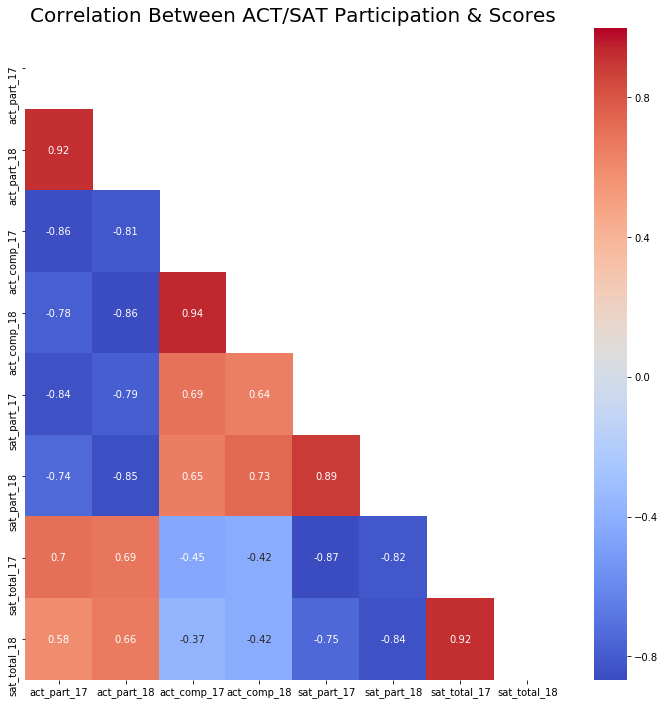

In [53]:
# mask from
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
mask = np.zeros_like(test_data[heat_map_variables].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,12))
sns.heatmap(test_data[heat_map_variables].corr(),
            annot=True, cmap='coolwarm', mask = mask)
plt.title('Correlation Between ACT/SAT Participation & Scores', fontsize=20)
plt.savefig('Exhibits/heatmap.jpg');


Here we find things that are expected and somewhat unexpected:

- There is a strong correlation between participation or score in a given test from year to year
- There is a negative correlation between a states score on the SAT and ACT, though these are the weakest correlations in the heatmap, this seems related to what we found above when looking at the highest scores in each test
- Similarly, mirroring what was found above, there is a negative correlation between participation in a given test and average score, these are generally quite strong correlations

##### Histogram Analysis

In [54]:
# Thanks Jakob for helping me make this work
# https://stackoverflow.com/questions/20174468/how-to-create-subplots-of-pictures-made-with-the-hist-function-in-matplotlib-p
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for idx, ax in enumerate(ax): # Gives us an index value to get into all our lists
        ax.hist(dataframe[list_of_columns[idx]]) # feel free to add more settings
        ax.set_title(list_of_titles[idx],fontsize=15)
        ax.set_xlabel(list_of_xlabels[idx],fontsize=12)
        # Set titles, labels, etc here for each subplot

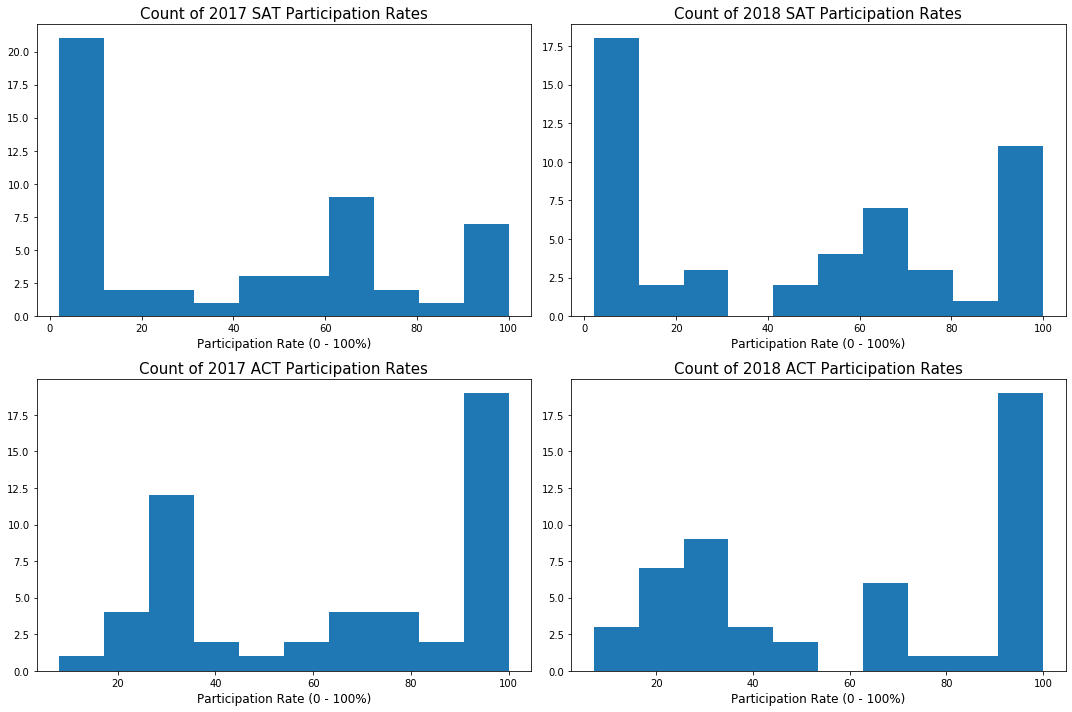

In [55]:
# Participation Rates for SAT & ACT
part_rate_columns = ['sat_part_17','sat_part_18','act_part_17','act_part_18']

part_rate_titles = ['Count of 2017 SAT Participation Rates','Count of 2018 SAT Participation Rates',
                   'Count of 2017 ACT Participation Rates','Count of 2018 ACT Participation Rates']

part_rate_xlabels = ['Participation Rate (0 - 100%)','Participation Rate (0 - 100%)',
                     'Participation Rate (0 - 100%)','Participation Rate (0 - 100%)',]

subplot_histograms(test_data,part_rate_columns,part_rate_titles,part_rate_xlabels)
plt.tight_layout();


We can see that there are more states at or near 100% SAT participation in 2018. For the ACT it seems as though there has been some movement of the 50-100% participation rates into sub 50% participation rate.

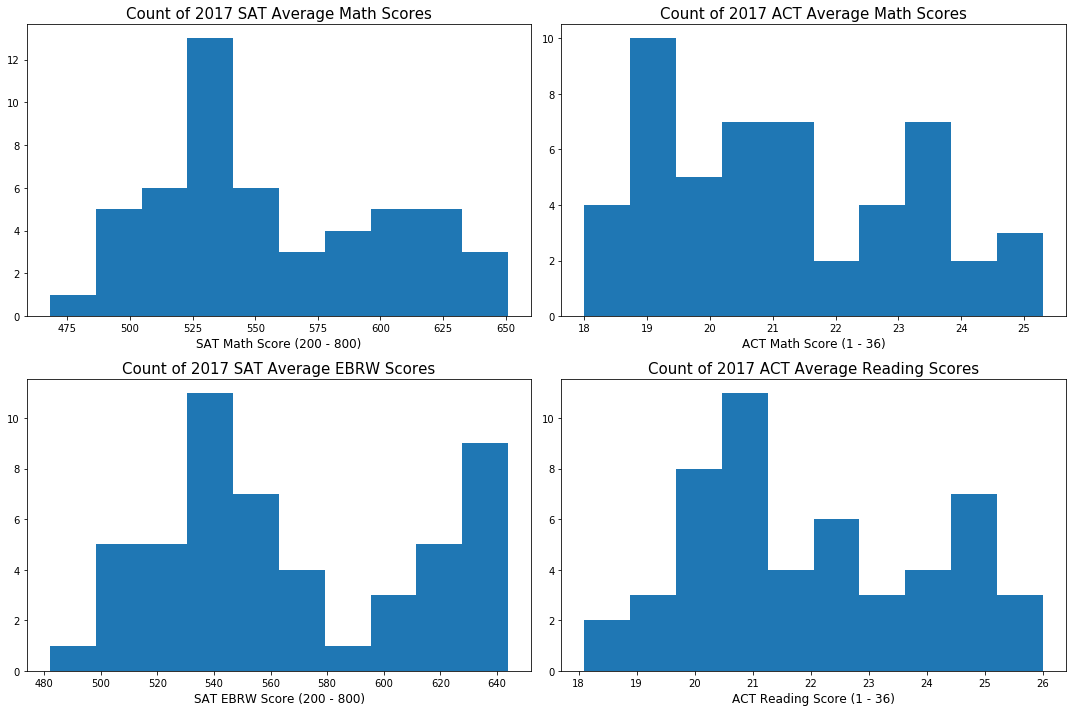

In [56]:
math_read_columns = ['sat_math_17','act_math_17','sat_ebrw_17','act_read_17']

math_read_titles = ['Count of 2017 SAT Average Math Scores','Count of 2017 ACT Average Math Scores',
                   'Count of 2017 SAT Average EBRW Scores','Count of 2017 ACT Average Reading Scores']

math_read_xlabels = ['SAT Math Score (200 - 800)','ACT Math Score (1 - 36)',
                    'SAT EBRW Score (200 - 800)','ACT Reading Score (1 - 36)']

subplot_histograms(test_data,math_read_columns,math_read_titles,math_read_xlabels);
plt.tight_layout()


Average reading / writing scores for both tests seem to be higher than the math scores for the corresponding test.

###### Plot and interpret scatter plots

In [57]:
# Thanks Jakob for helping me make this work
# https://stackoverflow.com/questions/20174468/how-to-create-subplots-of-pictures-made-with-the-hist-function-in-matplotlib-p
def subplot_scatter(dataframe, list_of_columns, columns, list_of_titles, list_of_xlabels, list_of_ylabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for idx, ax in enumerate(ax): # Gives us an index value to get into all our lists
        ax.scatter(dataframe[list_of_columns[idx]],dataframe[columns[idx]]) # need 2 sets of columns for scatter plots
        ax.set_title(list_of_titles[idx],fontsize=15)
        ax.set_xlabel(list_of_xlabels[idx],fontsize=12)
        ax.set_ylabel(list_of_ylabels[idx],fontsize=12)
        # Set titles, labels, etc here for each subplot

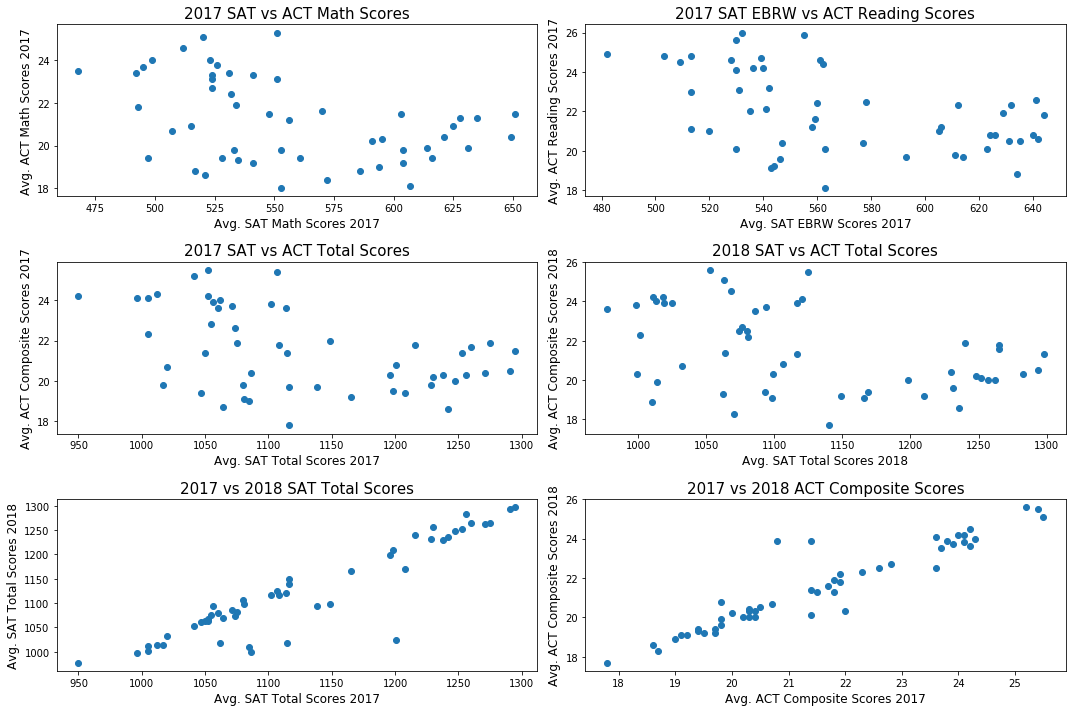

In [58]:
scatter_title = ['2017 SAT vs ACT Math Scores','2017 SAT EBRW vs ACT Reading Scores',
                '2017 SAT vs ACT Total Scores','2018 SAT vs ACT Total Scores',
                '2017 vs 2018 SAT Total Scores','2017 vs 2018 ACT Composite Scores']

scatter_x_data = ['sat_math_17','sat_ebrw_17','sat_total_17',
                  'sat_total_18','sat_total_17','act_comp_17']

scatter_y_data = ['act_math_17','act_read_17','act_comp_17',
                  'act_comp_18','sat_total_18','act_comp_18']

scatter_xlabel = ['Avg. SAT Math Scores 2017','Avg. SAT EBRW Scores 2017', 
                  'Avg. SAT Total Scores 2017','Avg. SAT Total Scores 2018',
                  'Avg. SAT Total Scores 2017','Avg. ACT Composite Scores 2017']

scatter_ylabel = ['Avg. ACT Math Scores 2017','Avg. ACT Reading Scores 2017', 
                  'Avg. ACT Composite Scores 2017','Avg. ACT Composite Scores 2018',
                  'Avg. SAT Total Scores 2018','Avg. ACT Composite Scores 2018']

subplot_scatter(test_data,scatter_x_data,scatter_y_data,scatter_title,scatter_xlabel, scatter_ylabel)
plt.tight_layout();

The 2017 vs 2018 SAT Total Scores and the corresponding ACT Scores scatter plots show the cleanest linear relationships. However, the ACT has 2 pretty clear outliers and the SAT has 1. It seems likely that these are Colorado and Illinois given they both flipped from ACT to SAT dominant and what we know about scores going down when a higher percentage of students take the test. 

Upon checking quickly, it was confirmed that Colorado was one of the outliers in both cases, however, Illinois only was for the ACT scores and not the SAT scores.  

##### Boxplot Exploration

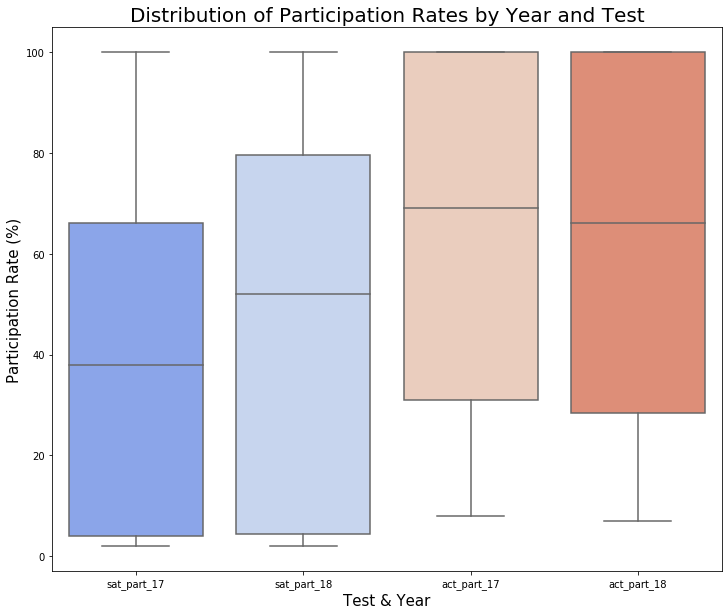

In [59]:
# Boxplot of participation rates
box_part = ['sat_part_17','sat_part_18','act_part_17','act_part_18']
plt.figure(figsize=(12,10))
sns.boxplot(data=test_data[box_part], palette='coolwarm')
plt.xlabel('Test & Year', fontsize=15)
plt.ylabel('Participation Rate (%)', fontsize=15)
plt.title('Distribution of Participation Rates by Year and Test', fontsize=20)
plt.savefig('Exhibits/boxplot.jpg');

Clear increase in SAT participation going from 2017 to 2018. Despite lowered median participation rates of the ACT it is still more popular if we don't take into account state populations.

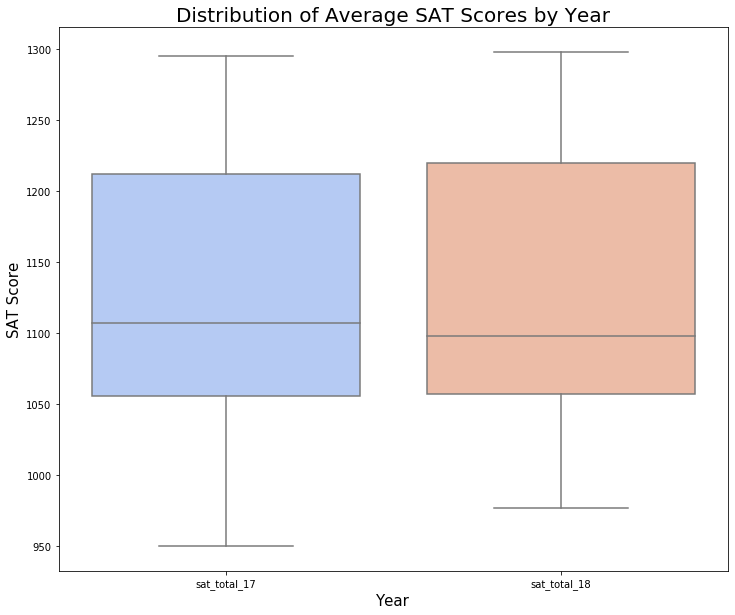

In [60]:
# Boxplot of total SAT scores
box_part = ['sat_total_17','sat_total_18']
plt.figure(figsize=(12,10))
sns.boxplot(data=test_data[box_part], palette='coolwarm')
plt.xlabel('Year', fontsize=15)
plt.ylabel('SAT Score', fontsize=15)
plt.title('Distribution of Average SAT Scores by Year', fontsize=20)
plt.savefig('Exhibits/boxplot.jpg');

Average SAT score went down a bit as did it's middle 2 quartiles. However this is to be expected given the increased participation rate adding additional students drives down average scores as we saw in the heatmap above, this is likely due to selection bias.  Additionally this analysis doesn't make a ton of sense as average SAT should remain essentially constant if we look accross the population as the College Board scales the results so the median is ~1060. In looking state by state without accounting for population we can get weird results.

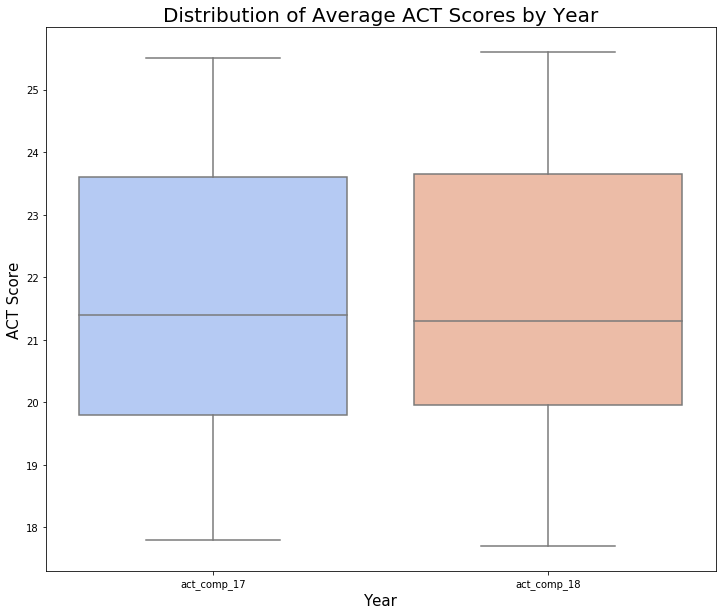

In [61]:
# Boxplot of composite ACT scores
box_part = ['act_comp_17','act_comp_18']
plt.figure(figsize=(12,10))
sns.boxplot(data=test_data[box_part], palette='coolwarm')
plt.xlabel('Year', fontsize=15)
plt.ylabel('ACT Score', fontsize=15)
plt.title('Distribution of Average ACT Scores by Year', fontsize=20)
plt.savefig('Exhibits/boxplot.jpg');

Here we see basically an inverse of the above with the same caveats applying

##### Tableau Choropleth Map 

Findings and presentation are geared towars a non-technical audience and the data is nicely grouped into US states making a choropleth map and ideal way of displaying data. First we will create a new dataframe and export to CSV for use in Tableau.

In [62]:
# take the columns we want into tableau (total scores, participation, no booleans)
tableau_cols = ['state','part_inc',
                'sat_part_17','sat_part_18',
                'sat_part_inc','act_part_17',
                'act_part_18','act_part_inc',
                'act_comp_17','act_comp_18',
                'sat_total_17','sat_total_18']

test_tableau = test_data[tableau_cols]

There are a couple of new variables we would like to calculate and take a look at in Tableau:
- Which test was dominant (i.e. taken by a higher percentage of students) in each year and whether it changed (similar to our sat_dom variables but 0 - 3 instead of boolean
- States that do not have a near universal test (>2/3 of students taking that test) this will be 0,1 (as opposed to True, False) to make a choropleth easier to make, and will help inform which states would be worthy targets for increased participation

In [63]:
# Which test was dominant when function
# Function not intended to be universal and variable names are specific
# loops through the 2 sat_dom_'year' columns
def test_dom(sat_dom_17, sat_dom_18):
    if sat_dom_17 == False:
        # Check year 2
        if sat_dom_18 == False:
            # if SAT participation in both years is lower then return 0
            return 0
        else:
            # other wise return 2, higher numbers will indicate SAT was dominant in 2018
            return 2
    else:
        # now if SAT was dominant in 2017, check year 2
        if sat_dom_18 == False:
            # if SAT participation dropped below ACT in 2018 return 1
            return 1
        else:
            # if SAT was dominant bother years return 3
            return 3

In [64]:
# This gives a warning that there is a better way, but it works so we'll keep it for now
# Point for potential future improvement
test_tableau['test_dom'] = [test_dom(test_data['sat_dom_17'][i],test_data['sat_dom_18'][i]) for i in range(len(test_data['sat_dom_18']))]

/Users/magnusbigelow/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
# test for a single dominant player in 2018
test_tableau['dom_18'] = ((test_data['sat_part_18'] > 66) | (test_data['act_part_18'] > 66)).astype(int)

/Users/magnusbigelow/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Now save to csv

In [66]:
test_tableau.to_csv('Data/test_tableau.csv')

Choropleth map showing whether a state had greater SAT or ACT participation in 2017 and 2018. Yellow states had greater SAT participation in 2017 and 2018, blue had greater ACT participation. Light yellow (Illinois and Colorado) switch from more ACT to more SAT

![Choropleth SAT or ACT Dominant](./Exhibits/ACTorSATDominant.png)

Choropleth showing states with one test with >2/3 participation (blue) and no tests with >2/3 participation, yellow.

From what we saw in the heatmap, it seems likely that when students are taking the test that isn't standard they are likely to be high achieving students, thus when there isn't a standard test it is likely that many students are falling through the cracks even if the combined participation is high.

![Standard or not Choropleth](./Exhitbits/StandardorNoStandard.png)

From this map we can see that in particular the Southwest US, along the Mexico border, has a number of states without a standard test. This is also an area with a large number immigrants and people that aren't aware of the SAT or the possibility of going to college. This is the area we will focus on as the ideal place for the College Board to invest resources.

## Outside Research

Based on the EDA and further visual analysis there are 4 states of particular interest: Colorado, Illionois, Florida and Alaska. Below we will identify why they are of interest and what led to their interesting changes in the SAT and ACT.

**Colorado**: saw an 89% spike in SAT participation and 70% decrease in ACT participation.

'Colorado has given a college entrance exam each spring to all 11th graders enrolled in public schools since 2001. In 2015 the Colorado legislature passed House Bill 15-1323, requiring the state to competitively bid for a new 10th grade exam that is aligned to both the Colorado Academic Standards and an 11th grade college entrance exam. The legislation also added the opportunity for students to take an additional, optional essay as part of their college entrance exam at no cost to the student. **The selection committee chose the PSAT for 10th graders and the SAT for the 11th grade college entrance exam because of their alignment to the high school Colorado Academic Standards and because the College Board’s reports and free test preparation services could be used by all students.** For 2018, the PSAT 8/9 was added for students in grade 9. Students who choose to participate in services offered by The College Board will be connected to resources and activities designed to help identify next steps for extra support or possible acceleration.'

Source: https://www.cde.state.co.us/assessment/coloradosat

As we can see the SAT won the competetive bidding process to take over from the ACT as the standard test for all 11th graders starting with the class of 2018. This is what caused the huge change and shows us that states having a standard test and a competetive bidding process is the best opportunity for large change in participation rates.

**Illinois**: saw a 90% spike in SAT participation and 50% decrease in ACT participation.

'In 2015, the state board called for bids for 11th grade assessments and chose the College Board’s SAT, a standardized test used commonly for college applications.'

Source: https://www.chalkbeat.org/posts/chicago/2018/07/27/act-protests-state-boards-embrace-of-rival-test-provider/

We can see that Illinois has the same reason as Colorado for the large swing in participation rates.

**Florida**: 14% increase in SAT participation from 83% to 97%, near universal

'**Officials attributed the increase to many school districts, including those in Central Florida, offering free SAT “school day” events**, where teenagers can take the exam during a regular school day with the cost covered by their schools, not their parents.

“Students have had the chance to take the SAT without any obstacles,” said Jane Dapkus, a vice president at the College Board, during a telephone briefing with reporters.'

Source: https://www.orlandosentinel.com/news/education/os-ne-act-sat-florida-scores-20181024-story.html

Florida did not see as large an increase as Colorado and Illinois, however, we can see that the College Board's 'SAT School Day' is credited with a large portion of the increase in participation. This shows that the College Board can take action itself in conjunction with local school districts to drive large increases in participation, though the results aren't as dramatic as with a statewide mandate.

**Alaska**: 32% drop in ACT participation without similar increase in SAT participation

'Alaska's high school students no longer need to take the SAT, ACT or WorkKeys test to get their diplomas. The state law requiring the college or career readiness tests expired Thursday.

As of now, the Class of 2017 will only need to meet credit requirements to get their diplomas, said Margaret MacKinnon, director of assessment and accountability at Alaska's state education department.'

Source: https://www.adn.com/alaska-news/education/2016/06/30/students-no-longer-need-national-tests-to-graduate/

Here we see the negative side of legislation, when Alaska's SAT / ACT madate went away far fewer students took the ACT within a year of the legislation expiring. This shows the importance of keeping close contact with legislatures and ensuring they understand the value of college readiness tests.

From these states we can see that policy is the number one driver of participation rate increases but the College Board can also increase participation by working with local communities and highlighting their SAT School Day and Khan Academy programs.

## Conclusions and Recommendations

From our understanding of which students are likely to fall through the cracks and which states are most in need of help, Arizona is our prime target for trying to increase participation. The state does not have a 'standard' (>2/3 participation) test and is along the Mexico boarder with a large % of immigrants. Additionally lessons learned from attempting to increase participation here can likely translate to nearby states of California and Texas which see similar patterns of participation and large percentage of immigrants.

**Recomendations for Increased Participation:**

Spread awareness of SAT programs and value
- Work with local policy makers, school administrators and parents, meaningful participation increase only happens when key stakeholder are bought in

Push for statewide SAT mandate
- Fastest, most effective way to increase participation

Highlight ‘SAT School Day’ and Khan Academy partnership
- Significant success in other geographies and highlights how College Board wants to work with students, parents and teachers


**Next Steps to Gain a Better Understanding and Provide more Concrete Reccomendations:**

- Examine more granular data at county or school district level
- Examine data split by race and socio-economic data
- Follow trends over a greater number of years
- Look more closely at state and local policies